In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

%matplotlib inline

import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = input_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [2]:
X = tf.placeholder(tf.float32,[None, 28,28, 1])
Y_ = tf.placeholder(tf.float32, [None, 10])

conv1_weights = tf.Variable(tf.truncated_normal([5, 5, 1, 32],  # 5x5 filter, depth 32.
                            stddev=0.1))
conv1_biases = tf.Variable(tf.zeros([32]))

conv2_weights = tf.Variable(tf.truncated_normal([5, 5, 32, 64], #5x5 filter, depth 32. 
                                stddev=0.1))
conv2_biases = tf.Variable(tf.constant(0.1, shape=[64]))

fc1_weights = tf.Variable(  # fully connected, depth 512.
                            tf.truncated_normal([7 * 7 * 64, 512],stddev=0.1))
fc1_biases = tf.Variable(tf.constant(0.1, shape=[512]))


fc2_weights = tf.Variable(tf.truncated_normal([512, 10],
                                            stddev=0.1))
fc2_biases = tf.Variable(tf.constant(0.1, shape=[10]))

In [3]:
conv = tf.nn.conv2d(X, 
                    conv1_weights,strides=[1, 1, 1, 1],
                    padding='SAME')

relu = tf.nn.relu(tf.nn.bias_add(conv, conv1_biases))

pool = tf.nn.max_pool(relu,
                          ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')

conv = tf.nn.conv2d(pool,
                        conv2_weights,
                        strides=[1, 1, 1, 1],
                        padding='SAME')

relu = tf.nn.relu(tf.nn.bias_add(conv, conv2_biases))

pool = tf.nn.max_pool(relu,
                          ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')

reshape = tf.reshape(pool, shape=[-1,7 * 7 * 64])

hidden = tf.nn.relu(tf.matmul(reshape, fc1_weights) + fc1_biases)

Ylogits = tf.matmul(hidden, fc2_weights) + fc2_biases

Y = tf.nn.softmax(Ylogits)

In [4]:
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=Y_, logits=Ylogits))

is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

tf.summary.scalar('loss', loss)
tf.summary.scalar('accuracy', accuracy)

with tf.name_scope('Weights'):
    tf.summary.histogram("weight1", conv1_weights)
    tf.summary.histogram("weight2", conv2_weights)
    
summary_op = tf.summary.merge_all()

train_step = tf.train.AdamOptimizer().minimize(loss)


In [7]:
#create session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

#create summary op to write logs to Tensorboard
train_summary_writer = tf.summary.FileWriter('logs/cnn_relu_train', graph=sess.graph)
test_summary_writer = tf.summary.FileWriter('logs/cnn_relu_test', graph=sess.graph)

for i in range(4000):
    #load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data={X: batch_X, Y_: batch_Y}
    
    #train    
    _,summary = sess.run([train_step,summary_op], feed_dict=train_data)
    # Write logs at every iteration
    train_summary_writer.add_summary(summary,i)
    if i % 100 == 0:        
        #success ?
        ta,tc = sess.run([accuracy,loss],feed_dict=train_data)
        test_data = {X: mnist.test.images, Y_: mnist.test.labels}
        va,vc,summary_test = sess.run([accuracy,loss,summary_op],feed_dict=test_data)
        test_summary_writer.add_summary(summary_test,i)
        print("Step : %d Batch : acc = %.4f loss = %.4f | Test acc = %.4f loss = %.4f" % (i,ta,tc,va,vc))   
        
    #--- edit
#success on test data?
test_data = {X: mnist.test.images, Y_: mnist.test.labels}
a,c = sess.run([accuracy, loss], feed_dict=test_data)
print("Test data acc = %.4f loss = %.4f" % (a,c))

Step : 0 Batch : acc = 0.2400 loss = 4.1688 | Test acc = 0.1588 loss = 4.3620
Step : 100 Batch : acc = 0.9300 loss = 0.1857 | Test acc = 0.9493 loss = 0.1781
Step : 200 Batch : acc = 1.0000 loss = 0.0525 | Test acc = 0.9672 loss = 0.1058
Step : 300 Batch : acc = 0.9700 loss = 0.0674 | Test acc = 0.9790 loss = 0.0632
Step : 400 Batch : acc = 0.9600 loss = 0.1108 | Test acc = 0.9758 loss = 0.0726
Step : 500 Batch : acc = 1.0000 loss = 0.0484 | Test acc = 0.9815 loss = 0.0590
Step : 600 Batch : acc = 0.9900 loss = 0.0483 | Test acc = 0.9792 loss = 0.0634
Step : 700 Batch : acc = 0.9800 loss = 0.0271 | Test acc = 0.9856 loss = 0.0442
Step : 800 Batch : acc = 0.9900 loss = 0.0179 | Test acc = 0.9815 loss = 0.0557
Step : 900 Batch : acc = 0.9900 loss = 0.0180 | Test acc = 0.9872 loss = 0.0377
Step : 1000 Batch : acc = 0.9900 loss = 0.0177 | Test acc = 0.9861 loss = 0.0377
Step : 1100 Batch : acc = 0.9800 loss = 0.0630 | Test acc = 0.9878 loss = 0.0382
Step : 1200 Batch : acc = 0.9800 loss = 

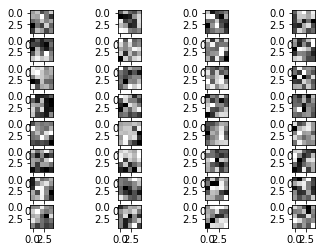

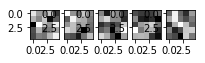

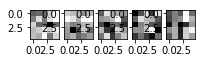

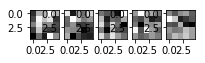

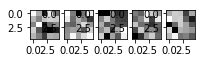

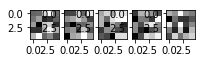

In [26]:
wts = conv1_weights.eval()
#wts[:,:,0,0].shape
for i in range(32):
    plt.subplot(8,4, i+1)
    plt.imshow(wts[:,:,0,i], interpolation="nearest", cmap="gray")
plt.show()
wts = conv2_weights.eval()
wts[:,:,0,0].shape
for i in range(5):
    for j in range(5):
        plt.subplot(1,10, j+1)
        plt.imshow(wts[:,:,i,j], interpolation="nearest", cmap="gray")  
    plt.show()